In [1]:
#importing all required libraries
%load_ext autoreload

import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Gender']

In [5]:
def impute_missing_values(df):
    for column in df.columns:
        # Imputing with mean for numerical columns
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].mean(), inplace=True)
        # Imputing with mode for categorical columns
        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Applying the imputation function to the dataset
imputed_data = impute_missing_values(df.copy())
imputed_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
imputed_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
for col in categorical_cols:
    value_counts = imputed_data[col].value_counts()
    print(f'Value counts for column "{col}":')
    print(value_counts)

Value counts for column "Gender":
Female    112
Male       88
Name: Gender, dtype: int64


In [8]:
def treat_outliers(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for column in num_cols:
        # Calculate the IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define limits for potential outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Treat outliers by capping and flooring
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Applying the outlier treatment
treated_data = treat_outliers(imputed_data.copy())


In [9]:
treated_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
numerical_cols = treated_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

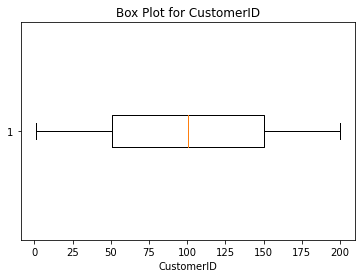

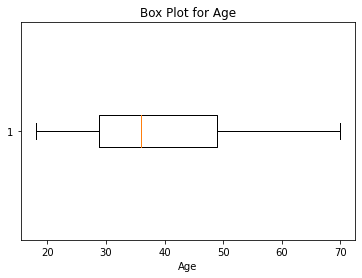

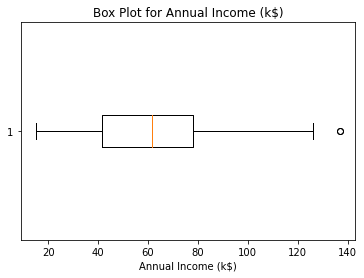

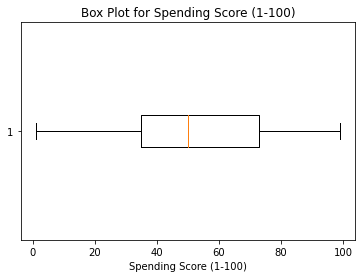

In [11]:
import matplotlib.pyplot as plt
# Loop to create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()
    print("")

In [12]:
treated_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.517500,50.200000
std,57.879185,13.969007,26.143551,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,132.750000,99.000000


In [13]:
categorical_cols = treated_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Gender']

In [14]:
# Generate a summary of statistical information for categorical columns
cat_summary = treated_data[categorical_cols].describe()

print(cat_summary)

        Gender
count      200
unique       2
top     Female
freq       112


In [15]:
# Re-applying get_dummies with drop_first=True to reduce the number of columns
encoded_data_reduced = pd.get_dummies(treated_data, columns=categorical_cols, drop_first=False)
encoded_data_reduced.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15.0,39,0,1
1,2,21,15.0,81,0,1
2,3,20,16.0,6,1,0
3,4,23,16.0,77,1,0
4,5,31,17.0,40,1,0


In [16]:
#define new data set by removing new unwanted variableas customer id and gender
X = encoded_data_reduced[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Female", "Gender_Male"]]
X.head()
X = X.drop(["Gender_Female"],axis=1)

In [17]:
#to apply PCA to check clusters later

# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

# Transform samples using the PCA fit
pca_2d = pca.transform(X)

In [18]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl


In [19]:
!conda update conda -y


Solving environment: ...working... done

# All requested packages already installed.



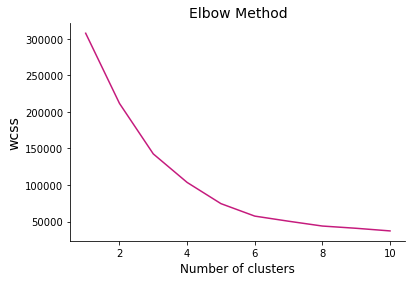

In [20]:
#elbow criterian to decide about the number of clusters
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [21]:
#running k means algorithms
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict
y_means = kmeans.fit_predict(X)

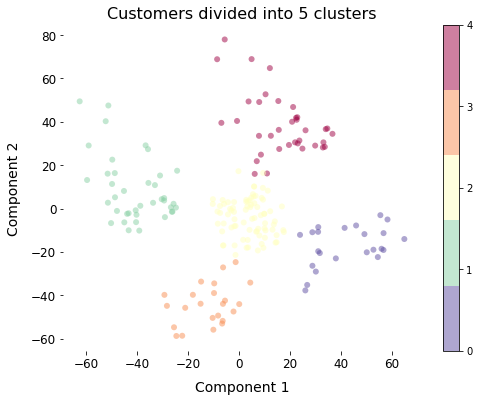

In [22]:
#to check now how the clusters look like

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means,
            edgecolor="none",
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Customers divided into 5 clusters', size=16)

plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()



In [24]:
#to derive centriods for each of five clusters

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Gender_Male"])

centroids.index_name = "ClusterID"

centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)


centroids

,Age,Annual Income,Spending,Gender_Male,ClusterID
0,45.217391,26.304348,20.913043,0.391304,0
1,32.692308,86.429487,82.128205,0.461538,1
2,43.088608,55.291139,49.569620,0.417722,2
3,25.521739,26.304348,78.565217,0.391304,3
4,40.666667,87.631944,17.583333,0.527778,4


In [25]:
def categorise(row):
    if row['ClusterID'] == 0:
        return 'MiddleAge_LowIncome_LowSpending'
    elif row['ClusterID'] == 1:
        return 'Youngster_HighIncome_HighSpending'
    elif row['ClusterID'] == 2:
        return 'MiddleAge_MidIncome_MidSpend'
    elif row['ClusterID'] == 3:
        return 'MiddleAge_HighIncome_LowSpend'
    return 'Youngsters_LowIncome_HighSpend'

In [26]:
centroids['Cluster_Nature'] =centroids.apply(lambda row: categorise(row), axis=1)
centroids

,Age,Annual Income,Spending,Gender_Male,ClusterID,Cluster_Nature
0,45.217391,26.304348,20.913043,0.391304,0,MiddleAge_LowIncome_LowSpending
1,32.692308,86.429487,82.128205,0.461538,1,Youngster_HighIncome_HighSpending
2,43.088608,55.291139,49.569620,0.417722,2,MiddleAge_MidIncome_MidSpend
3,25.521739,26.304348,78.565217,0.391304,3,MiddleAge_HighIncome_LowSpend
4,40.666667,87.631944,17.583333,0.527778,4,Youngsters_LowIncome_HighSpend


In [27]:
#predicting the new point behaviour

X_new = np.array([[19, 15, 39, 1]])

new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")
if new_customer ==0:
    print(f"The new customer is MiddleAge_LowIncome_LowSpending" )
elif new_customer == 1:
    print(f'Youngster_HighIncome_HighSpending')
elif new_customer == 2:
    print(f'MiddleAge_MidIncome_MidSpend')
elif new_customer == 3:
    print(f'MiddleAge_HighIncome_LowSpend')
else:
    print(f"Youngsters_LowIncome_HighSpend")

The new customer belongs to segment 0
The new customer is MiddleAge_LowIncome_LowSpending


**Additional Graphs - to be only executed in the order mentione**

In [28]:
# Performing K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15.0,39,1,1
1,21,15.0,81,1,4
2,20,16.0,6,0,1
3,23,16.0,77,0,4
4,31,17.0,40,0,1


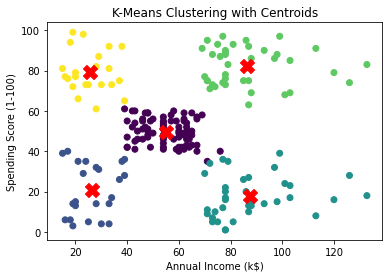

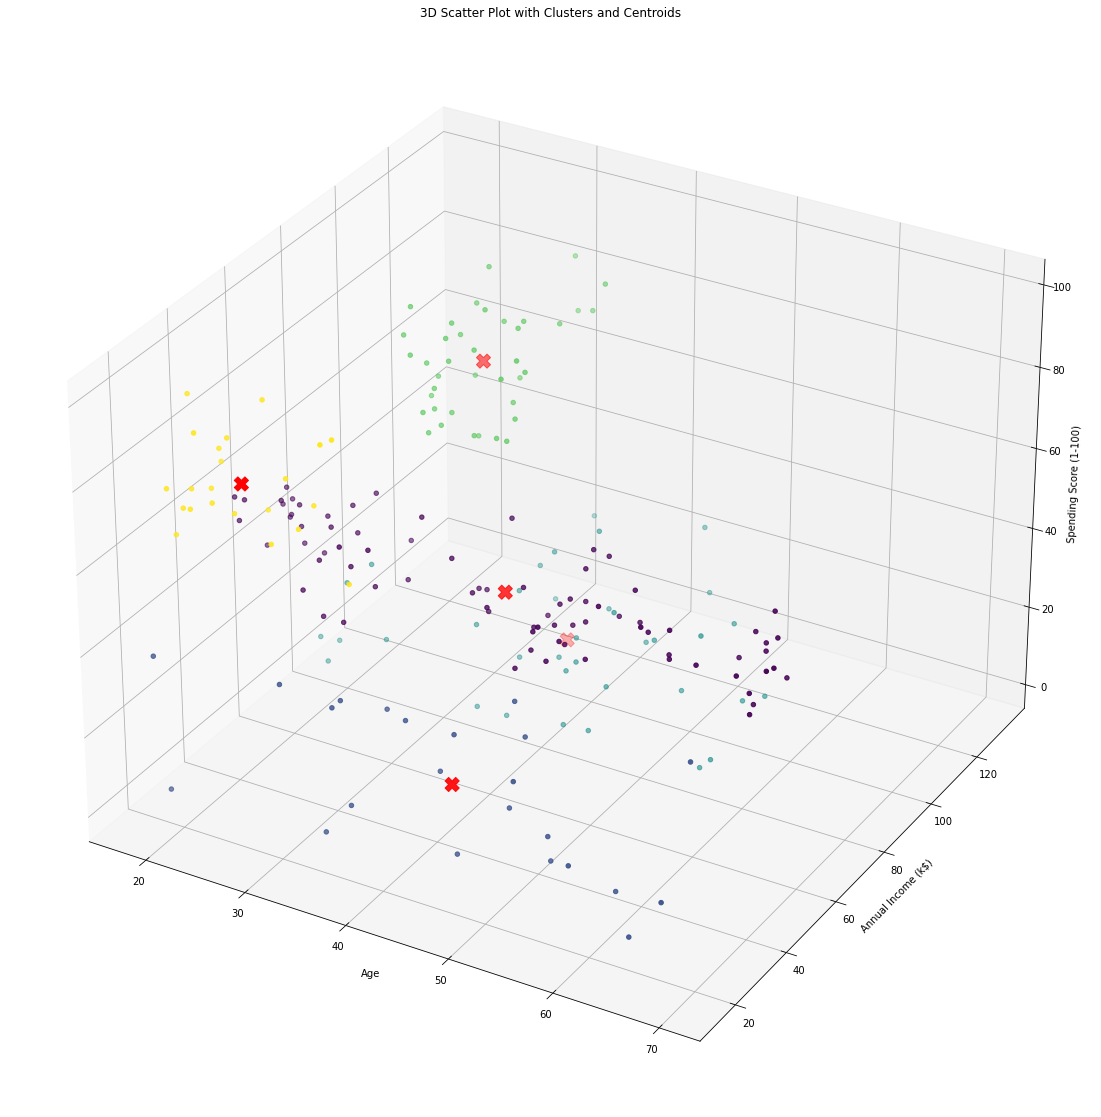

In [29]:
# Centroid plot (assuming X contains numerical features)
centroids = kmeans.cluster_centers_
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], marker='X', s=200, color='red')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
print("")

# 3D scatter plot (assuming X has three numerical features)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['Cluster'], cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', s=200, color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters and Centroids')
plt.show()
print("")